In [272]:
import quandl 

quandl.ApiConfig.api_key = 'SFL-tauXjnzf5L42yzux'
# BAX as per Algo101 https://cdn.fs.teachablecdn.com/2Vginb35REuzUJxJWiNE
# BAX is a Short Term Interest Rate (STIR) future contract
# Final settlement price is as per CDOR - https://www.m-x.ca/marc_terme_bax_cdor_en.php
# CDOR calculated by Refinitiv (ex Thompson Reuters) https://www.refinitiv.com/en/financial-data/financial-benchmarks/interest-rate-benchmarks/canadian-interest-rates
data = quandl.get('MX/BAXM2020', start_date='2010-02-14', end_date='2020-02-14')
data

,Bid Price,Ask Price,Bid Size,Ask Size,Last Price,Volume,Last Close Price,Net Change,Open Price,High Price,Low Price,Total Value,Nb. Trades,Settlement Price,Prev. Day Open Interest,Implied Volatility
Date,,,,,,,,,,,,,,,,
2017-06-20,98.270,98.320,50.0,50.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,98.300,0.0,0.0
2017-06-21,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,98.320,0.0,0.0
2017-06-22,98.250,98.300,50.0,50.0,98.270,9.0,98.290,-0.020,98.270,98.270,98.270,883.0,4.0,98.290,0.0,0.0
2017-06-23,98.280,98.320,50.0,50.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,98.320,9.0,0.0
2017-06-26,98.250,98.310,75.0,50.0,98.320,6.0,98.320,0.000,98.320,98.320,98.320,589.0,2.0,98.310,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-10,98.190,98.200,271.0,187.0,98.195,18603.0,98.200,-0.005,98.175,98.210,98.165,1826117.0,1190.0,98.200,217628.0,0.0
2020-02-11,98.170,98.175,265.0,62.0,0.000,23726.0,0.000,0.000,98.185,98.195,98.170,2328932.0,1158.0,98.175,200767.0,0.0
2020-02-12,98.145,98.150,300.0,10.0,0.000,24964.0,0.000,-0.005,98.175,98.175,98.145,2449690.0,1441.0,98.155,209518.0,0.0


In [242]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series
data.loc['20170620', ['Open Price', 'Last Close Price']] # pandas.core.series.Series
s = data.loc[data.index[0], ['Open Price', 'Last Close Price']] # pandas.core.series.Series
s.values

array([0., 0.])

In [12]:
asks = data['Ask Price']
asks

Date
2017-06-20    98.320
2017-06-21     0.000
2017-06-22    98.300
2017-06-23    98.320
2017-06-26    98.310
               ...  
2020-02-10    98.200
2020-02-11    98.175
2020-02-12    98.150
2020-02-13    98.160
2020-02-14    98.175
Name: Ask Price, Length: 664, dtype: float64

<AxesSubplot:xlabel='Date'>

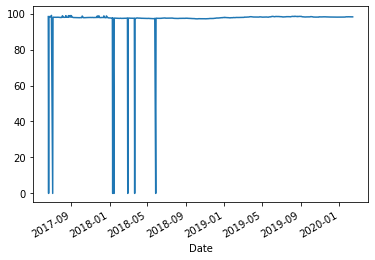

In [18]:
import matplotlib 
asks.plot()

<AxesSubplot:xlabel='Date'>

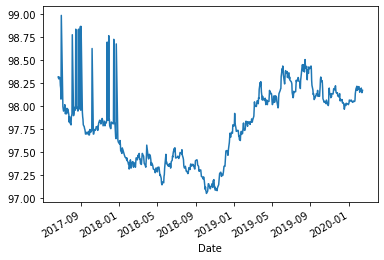

In [20]:
asks = asks.loc[(asks!=0)]
asks.plot()

<AxesSubplot:xlabel='Date'>

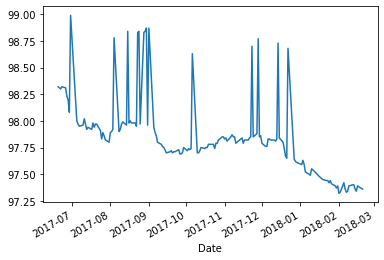

In [31]:
asks['2017-06-20':'2018-02-20'].plot()


<AxesSubplot:xlabel='Date'>

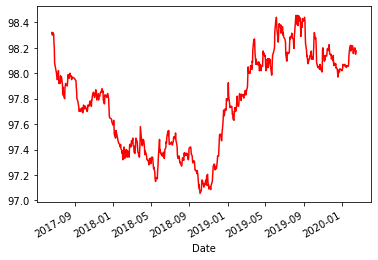

In [33]:
clean_asks = asks.loc[asks<98.5]
clean_asks.plot(color='r', label='BAX asks')


<AxesSubplot:xlabel='Date'>

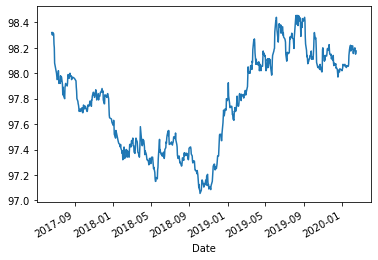

In [83]:
clean_asks.plot()

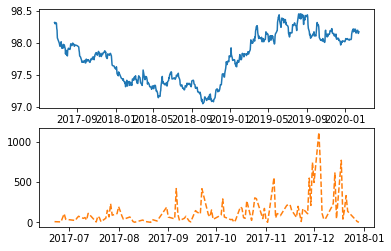

In [101]:
# https://matplotlib.org/gallery/pyplots/pyplot_two_subplots.html#sphx-glr-gallery-pyplots-pyplot-two-subplots-py
import matplotlib.pyplot as plt
import numpy as np
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 100.0, 0.1) # prices y axis
t2 = np.arange(0.0, volume.max(), 1) # volumes y axis

plt.figure()
plt.subplot(211)
# plt.plot(t1, f(t1), color='tab:blue', marker='o')
# plt.plot(t2, f(t2), color='black')

plt.plot(clean_asks, color='tab:blue')


plt.subplot(212)
plt.plot(non_zero_vol, color='tab:orange', linestyle='--')
plt.show()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

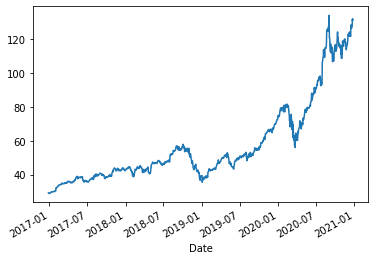

In [121]:
import yfinance as yf
aapl = yf.download(
            tickers='AAPL',
            interval="1d",
            start='2016-12-26',
            end='2020-12-26'
        )
aapl['Close'].plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

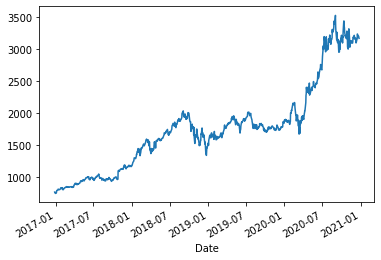

In [122]:
amzn = yf.download(
            tickers='AMZN',
            interval="1d",
            start='2016-12-26',
            end='2020-12-26'
        )
amzn['Close'].plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

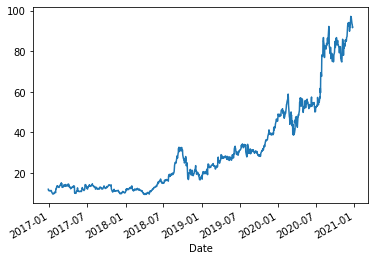

In [123]:
amd = yf.download(
            tickers='AMD',
            interval="1d",
            start='2016-12-26',
            end='2020-12-26'
        )
amd['Close'].plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

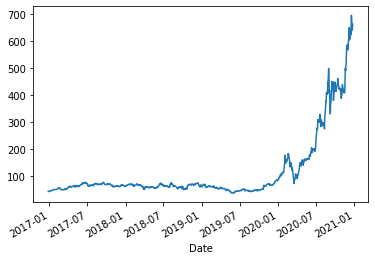

In [124]:
tsla = yf.download(
            tickers='tsla',
            interval="1d",
            start='2016-12-26',
            end='2020-12-26'
        )
tsla['Close'].plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

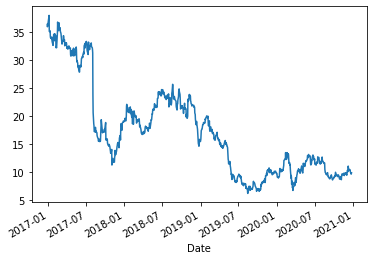

In [125]:
teva = yf.download(
            tickers='teva',
            interval="1d",
            start='2016-12-26',
            end='2020-12-26'
        )
teva['Close'].plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

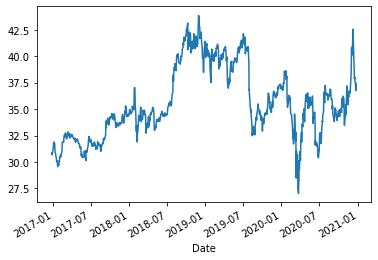

In [126]:
pfe = yf.download(
            tickers='PFE',
            interval="1d",
            start='2016-12-26',
            end='2020-12-26'
        )
pfe['Close'].plot()

In [166]:
pfe
# type(pfe) # pandas.core.frame.DataFrame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-27,30.901329,31.043644,30.815939,30.863379,26.559515,11826300
2016-12-28,30.834915,31.015181,30.683111,30.692600,26.412554,14691500
2016-12-29,30.730551,30.948767,30.711575,30.825426,26.526855,14827300
2016-12-30,30.683111,30.929790,30.654650,30.815939,26.518690,19885400
2017-01-03,31.024668,31.309298,30.920303,31.309298,26.943249,23391800
...,...,...,...,...,...,...
2020-12-18,37.990002,38.090000,37.500000,37.680000,37.680000,60259200
2020-12-21,37.279999,37.400002,36.910000,37.380001,37.380001,40891800
2020-12-22,37.209999,37.330002,36.599998,36.740002,36.740002,33634400


In [157]:
open = pfe.loc['2016-12-27':'2016-12-30','Open']
type(open) # pandas.core.series.Series

pandas.core.series.Series

In [167]:
# select some rows and two colums 
op_cl = pfe.loc['2016-12-27':'2016-12-30',['Open','Close']]
type(op_cl) # pandas.core.frame.DataFrame
op_cl

,Open,Close
Date,,
2016-12-27,30.901329,30.863379
2016-12-28,30.834915,30.692600
2016-12-29,30.730551,30.825426
2016-12-30,30.683111,30.815939


In [189]:
# select a column range - 4 colums
col_range = pfe.loc['2016-12-27':'2016-12-30', 'Open':'Close']
col_range

,Open,High,Low,Close
Date,,,,
2016-12-27,30.901329,31.043644,30.815939,30.863379
2016-12-28,30.834915,31.015181,30.683111,30.692600
2016-12-29,30.730551,30.948767,30.711575,30.825426
2016-12-30,30.683111,30.929790,30.654650,30.815939


In [176]:
# pick close prices from 2016-12-27 to 2016-12-30
col_range.loc['2016-12-27':'2016-12-30', 'Close']

Date
2016-12-27    30.863379
2016-12-28    30.692600
2016-12-29    30.825426
2016-12-30    30.815939
Name: Close, dtype: float64

In [188]:
# are there closes less than 30.81?
closes = col_range.loc['2016-12-27':'2016-12-30', 'Close']
closes.loc[closes <= 30.81] # yep there's one

Date
2016-12-28    30.6926
Name: Close, dtype: float64

In [211]:
# are there open > 30.83 and closes less than 30.81 ?
col_range[(col_range['Open'] > 30.83) & (col_range['Close'] < 30.81)] # get index .index[0] Timestamp('2016-12-28 00:00:00')

Timestamp('2016-12-28 00:00:00')

In [215]:
data.to_numpy()

array([[9.82700e+01, 9.83200e+01, 5.00000e+01, ..., 9.83000e+01,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.83200e+01,
        0.00000e+00, 0.00000e+00],
       [9.82500e+01, 9.83000e+01, 5.00000e+01, ..., 9.82900e+01,
        0.00000e+00, 0.00000e+00],
       ...,
       [9.81450e+01, 9.81500e+01, 3.00000e+02, ..., 9.81550e+01,
        2.09518e+05, 0.00000e+00],
       [9.81500e+01, 9.81600e+01, 4.03000e+02, ..., 9.81550e+01,
        1.97619e+05, 0.00000e+00],
       [9.81700e+01, 9.81750e+01, 3.18000e+02, ..., 9.81700e+01,
        1.95806e+05, 0.00000e+00]])